# Controlling a Rocket with Reinforcement Learning

## Problem Setup

Consider the problem of maximizing the terminal horizontal velocity component of a rocket in a specified time [t0, tf ] subject to a specified terminal altitude and a specified terminal vertical velocity component. **

The rocket is governed by the following equations of motion: \\
x1'(t) = x3(t)             # Horizontal Displacement \\
x2'(t) = x4(t)             # Vertical Displacement \\
x3'(t) = T cos(u(t))       # Horizontal Velocity \\
x4'(t) = T sin(u(t)) − g   # Vertical Velocity \\
u(t) is the inclination of the rocket's thrust vector to the horizontal. \\
T > g is a constant (the rocket's thrust).

Suppose that at time t=0 the rocket starts at rest. We wish to lift the rocket to a final height h in time tf, at which time the rocket's speed in the vertical direction should be zero.

** Problem from Primer on Optimal Control Theory (Speyer and Jacobson)

In [ ]:
## Imports
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [ ]:
## System Parameters:
g = 32 # Gravitational acceleration (ft/sec^2)
T = 2*g # Constant specific thrust of the rocket
h = 320000 # Final height in ft
t0 = 0 # Start time (sec)
tf = 900 # Final time (sec)
dt = 1 # Time step (in diff. eq. solver)
Nt = int(tf/dt)+1 # Number of time steps
tvec = np.linspace(0,tf,Nt) # Vector of time steps

## Initial Conditions:
## (zero displacement & velocity)
X0 = np.array([0,0,0,0])

## Final Conditions:
## (height h, zero vertical speed)
# x2_f = h
# x4_f = 0
# psif = np.array([x2_f,x4_f])

In [ ]:
## Solves the system's equations of motion:
def f_DynamicSim(uN,t0,tf,g,T,dt,X0):

  Nt = int(tf/dt) + 1 # Number of time steps
  Xi = X0 # Initialize state at ith time step
  XN = np.zeros((4,Nt)) # Initialize nominal state
  XN[:,0] = X0 # Initial conditions

  i = 0 # Initialize iteration counter
  ti = t0 # Initialize time counter
  # Iterate over time interval:
  # (At final time step: i+1 = tf/dt, where i = ti/dt => ti = tf - dt)
  while ti <= tf-dt:
    
    # Update derivative using the equations of motion
    Xp = np.array([Xi[2], Xi[3], T*np.cos(uN[i]), T*np.sin(uN[i]) - g])
    Xi = Xi + Xp*dt # Update state at ith time step

    XN[:,i+1] = Xi # Update nominal state
    i += 1 # Increment counter
    ti += dt # Increment timer

  # Ouput: Nominal state
  return XN

In [ ]:
# Plotting the nominal control and the nominal state:
def f_Plot_Control_State(XN,uN,tvec):

  # Individual states:
  x1_vec = XN[0,:] # Horizontal displacement
  x2_vec = XN[1,:] # Vertical displacement
  x3_vec = XN[2,:] # Horizontal velocity
  x4_vec = XN[3,:] # Vertical velocity

  # Final states:
  x1f = x1_vec[-1] # Final horizontal displacement
  x2f = x2_vec[-1] # Final vertical displacement
  x3f = x3_vec[-1] # Final horizontal velocity
  x4f = x4_vec[-1] # Final vertical velocity

  ## Plot of the nominal control vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(tvec, uN, '-', color = "black")
  ax.set_title('Nominal Control', fontsize = 20)
  ax.set_xlabel('Time (sec)', fontsize = 20)
  ax.set_ylabel('Rocket Angle (rad)', fontsize = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.grid()
  plt.show()

  # Plot of the nominal trajectory vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(x1_vec, x2_vec, '-', color = "black")
  ax.set_title('Nominal State', fontsize = 20)
  ax.set_xlabel('Horizontal Displacement (ft)', fontsize = 20)
  ax.set_ylabel('Vertical Displacement (ft)', fontsize = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)

  plt.grid()
  plt.show()

  # Print final height and speed:
  print("Final height =", round(x2f,3), "ft")
  print("Final upward speed =", round(x4f,3), "ft/s")

In [ ]:
## Plotting individual states vs time:
def f_Plot_States(XN,tvec):
  # Individual states:
  x1_vec = XN[0,:] # Horizontal displacement
  x2_vec = XN[1,:] # Vertical displacement
  x3_vec = XN[2,:] # Horizontal velocity
  x4_vec = XN[3,:] # Vertical velocity

  ## Plot of the horizontal displacement vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(tvec, x1_vec, '-', color = "black")
  ax.set_title('Horizontal Displacement vs Time')
  ax.set_xlabel('Time (sec)')
  ax.set_ylabel('Horizontal Displacement (ft)')
  plt.grid()
  plt.show()

  ## Plot of the vertical displacement vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(tvec, x2_vec, '-', color = "black")
  ax.set_title('Vertical Displacement vs Time')
  ax.set_xlabel('Time (sec)')
  ax.set_ylabel('Vertical Displacement (ft)')
  plt.grid()
  plt.show()

  ## Plot of the horizontal speed vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(tvec, x3_vec, '-', color = "black")
  ax.set_title('Horizontal Speed vs Time')
  ax.set_xlabel('Time (sec)')
  ax.set_ylabel('Horizontal Speed (ft/s)')
  plt.grid()
  plt.show()

  ## Plot of the upward speed vs time:
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(tvec, x4_vec, '-', color = "black")
  ax.set_title('Upward Speed vs Time')
  ax.set_xlabel('Time (sec)')
  ax.set_ylabel('Upward Speed (ft/s)')
  plt.grid()
  plt.show()

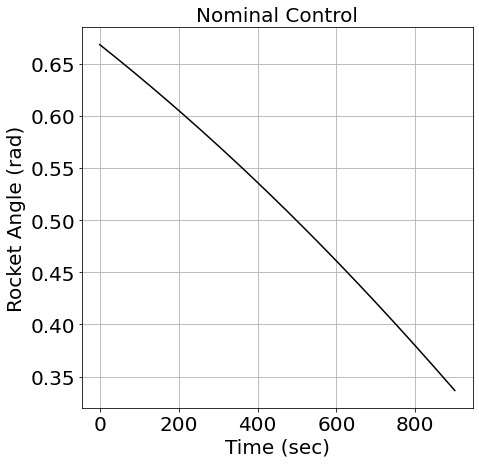

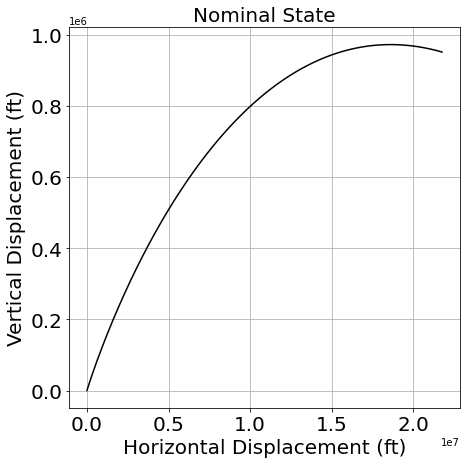

Final height = 951076.481 ft
Final upward speed = -660.95 ft/s


In [ ]:
## Guessing a nominal control:

# At time tf, the rocket should be nearly horizontal:
# => u(tf) = 0 = arctan[−ν4 − (tf − tf)*ν2] = arctan[−ν4]
# => ν4 = -tan(0) = 0

# On the other hand: At time tf, the rocket
# should have about zero vertical acceleration:
# => T*sin(u(tf)) = T*sin(arctan[−ν4 − (tf − tf)*ν2]) = g
# => ν4 = -tan(arcsin(1/2)) = -tan(pi/6) = -1/sqrt(3) ~ -0.58

# At time t0=0, suppose the rocket is at ui radians:
# => u(0) = ui = arctan[−ν4 − tf*ν2]
# => tan(ui) = -ν4 - tf*ν2
# => ν2 = -(tan(ui)+ν4)/tf

# Initial guess for nu4 and nu2:
nu4 = -0.35 # Guess for ν4
ui = math.pi/4.7 # Guess for initial angle
nu2 = -(np.tan(ui)+nu4)/tf # ν2
uN = np.array(np.arctan(-nu4 - (tf - tvec)*nu2)) # Nominal control

XN = f_DynamicSim(uN,t0,tf,g,T,dt,X0)

# Plotting the initial results:
f_Plot_Control_State(XN,uN,tvec)

# Plot the states
# f_Plot_States(XN,tvec)

## PD Controller (just because)

In [ ]:
## PD Controller:
def f_PD_Controller(Xi,ti,Nt,h,g,T,k_p=1,k_d=1):
  theta_balance = np.round(math.asin(g/T),5)
  P = k_p*(1-np.exp(-3*ti/Nt))*(h-Xi[1])/(3*h)
  D = -k_d*Xi[3]/5000
  return P + D  + theta_balance # Control

def f_DynamicSim_Control(t0,tf,h,g,T,dt,X0):
  Nt = int(tf/dt) + 1 # Number of time steps
  Xi = X0 # Initialize state at ith time step
  XN = np.zeros((4,Nt)) # Initialize nominal state
  XN[:,0] = X0 # Initial conditions
  uN = np.zeros(Nt) # Array of controls

  i = 0 # Initialize iteration counter
  ti = t0 # Initialize time counter
  # Iterate over time interval:
  # (At final time step: i+1 = tf/dt, where i = ti/dt => ti = tf - dt)
  while ti <= tf-dt:
    
    # Update derivative using the equations of motion
    u = f_PD_Controller(Xi,ti,Nt,h,g,T)
    uN[i] = u # Append control to array
    Xp = np.array([Xi[2], Xi[3], T*np.cos(u), T*np.sin(u) - g])
    Xi = Xi + Xp*dt # Update state at ith time step

    XN[:,i+1] = Xi # Update nominal state
    i += 1 # Increment counter
    ti += dt # Increment timer

  uN[i] = f_PD_Controller(Xi,ti,Nt,h,g,T)

  # Ouput: Nominal state
  return XN, uN

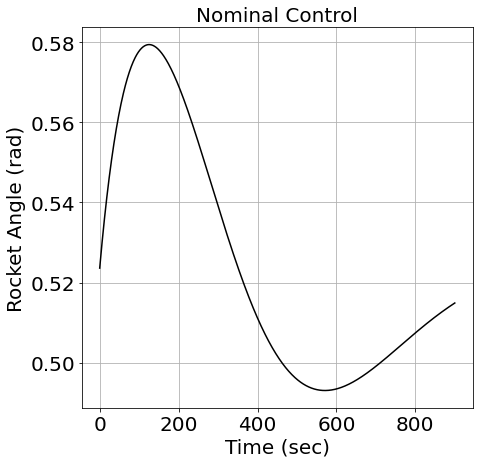

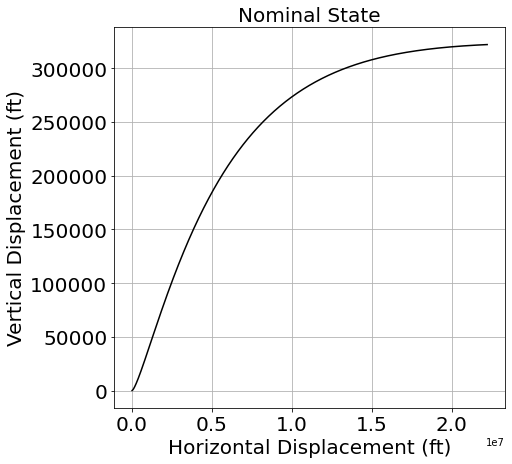

Final height = 322178.725 ft
Final upward speed = 32.741 ft/s


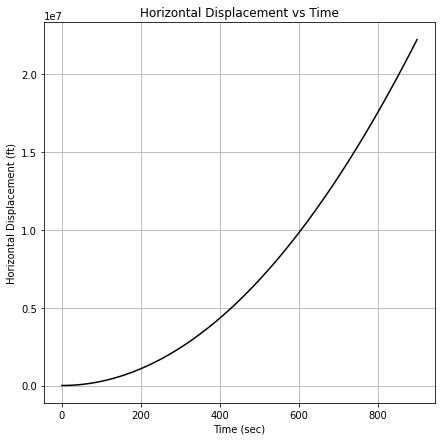

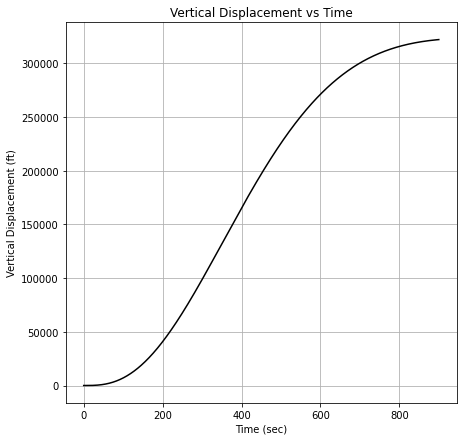

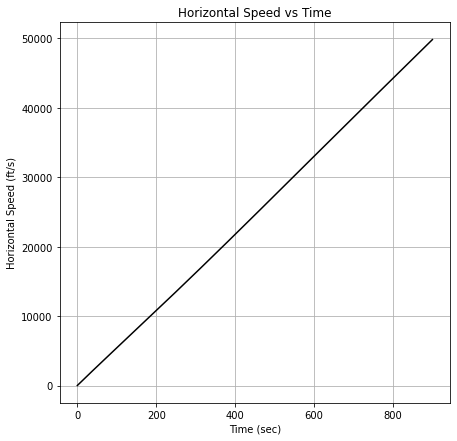

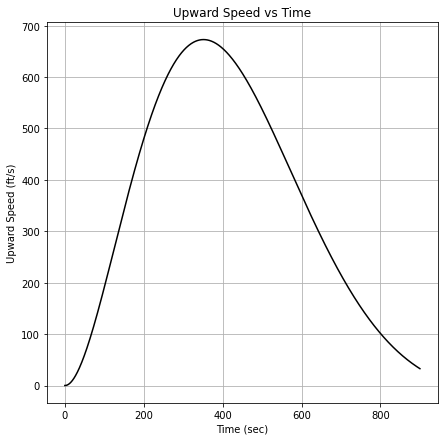

In [ ]:
# Run the dynamic model:
XN, uN = f_DynamicSim_Control(t0,tf,h,g,T,dt,X0)
# uN_diff = uN[1:Nt] - uN[0:Nt-1]

# Plotting the initial results:
f_Plot_Control_State(XN,uN,tvec)

# Plot the states
f_Plot_States(XN,tvec)

## Neural Net

### Network Architecture

In [ ]:
import numpy as np
import math
import torch
import torch.optim as optim
import torch.nn as nn
from matplotlib import pyplot as plt
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Convert training data to train_loader format
def f_Data(x,y,train_batch_sz=10,mode=0):
  # Inputs:
  # x: training data
  # y: training labels

  device = 'cuda' if torch.cuda.is_available() else 'cpu'

  # Convert to torch tensors:
  train_data= torch.from_numpy(x).float().to(device)
  if mode == 0:
    train_labels = torch.from_numpy(y).float().to(device)
  else:
    train_labels = torch.from_numpy(y).long().to(device)

  # Create dataset from tensors with matching first dimension
  # Samples will be drawn from the first dimension
  train_dataset = TensorDataset(train_data, train_labels)

  # Create a data loader from the dataset
  # Type of sampling and batch size are specified at this step
  train_loader = DataLoader(train_dataset, batch_size=train_batch_sz, shuffle=True)

  # Create an iterator on the training loader
  # (this is just to test the size of x_train and y_train)
  cur_x, cur_y = next(iter(train_loader))
  print(cur_x.size()) # x_train for current iteration
  print(cur_y.size()) # y_train for current iteration

  # variables for plotting results
  # res = 10
  # x_axis = (np.arange(data_range*res)-data_range/2*res).reshape(data_range*res,1)/res
  # x_axis_torch = torch.from_numpy(x_axis).float().to(device)

  return train_loader, train_data, train_labels

In [ ]:
# Fully-connected network for curve fitting:
class fc_net(torch.nn.Module):
# Network Structure:
# Fully Connected -> ReLu -> Fully Connected -> Linear

  # Initialize the network and specify input/output dimensions:
  def __init__(self, num_in, num_out, w1):
    super(fc_net, self).__init__()
    self.h1 = torch.nn.Linear(in_features=num_in, out_features=w1)  # Fully-connected layer
    self.h2 = torch.nn.Linear(in_features=w1, out_features=1) # Fully-connected layer
  
  # Build the network:
  def forward(self, inputs):
    a1 = F.relu(self.h1(inputs)) # ReLu activation
    a2 = self.h2(a1) # Linear activation
    # a2 = F.sigmoid(self.h2(a1),dim=-1) # Sigmoid activation
    return a2

In [ ]:
# Fully connected network for classification
class fc_net2(torch.nn.Module):
# Network Structure:
# Fully Connected -> ReLu -> Fully Connected -> Softmax
    def __init__(self, num_in, num_out, w1, w2, init_params=0):
        super(fc_net2, self).__init__()
        self.h1 = torch.nn.Linear(in_features=num_in, out_features=w1)  # Fully-connected layer 1
        self.h2 = torch.nn.Linear(in_features=w1, out_features=w2)  # Fully-connected layer 2
        self.h3 = torch.nn.Linear(in_features=w2, out_features=num_out) # Fully-connected layer 3

        # # Initialize weights and biases using Xavier initialization:
        # if init_params == 0:
        #   torch.nn.init.xavier_uniform_(self.h1.weight)
        #   torch.nn.init.zeros_(self.h1.bias)
        #   torch.nn.init.xavier_uniform_(self.h2.weight)
        #   torch.nn.init.zeros_(self.h2.bias)
        #   torch.nn.init.xavier_uniform_(self.h3.weight)
        #   torch.nn.init.zeros_(self.h3.bias)
    
    def forward(self, inputs):
        a1 = F.relu(self.h1(inputs)) # ReLu activation
        a2 = F.relu(self.h2(a1)) # ReLu activation
        a3 = F.softmax(self.h3(a2),dim=-1) # Softmax activation
        return a3

In [ ]:
# Train the model:
def train(model,loss,train_loader,optimizer,epoch=0):
  model.train()
  # print('Train Epoch: ', epoch)
  for batch_idx, (cur_x, cur_y) in enumerate(train_loader):

    optimizer.zero_grad() # Zero out gradients
    output = model.forward(cur_x) # Propagate forward through network
    cur_loss = loss(output, cur_y) # Compute loss at current iteration
    cur_loss.backward() # Backprop
    optimizer.step() # Step of optimizer
    losses.append(cur_loss)
    
    # if np.mod(batch_idx+1,it) == 0:
    #   print('Iteration: ', batch_idx+1, ' Loss: ', round(cur_loss.item(),5))

In [ ]:
# Test the model:
def test(model,loss,test_loader):
    model.eval()
    print('Test Set:')
    
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for batch_idx, (cur_x, cur_y) in enumerate(test_loader):

            output = model.forward(cur_x)
            test_loss = loss(output, cur_y)
            preds = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += preds.eq(cur_y.view_as(preds)).sum().item()
            acc = correct/len(test_loader.dataset)

        test_loss /= len(test_loader.dataset)
        print('    Average loss: ', format(test_loss.item(),"10.2E") , ' Accuracy: ', 100.*acc, '%')
    return(test_loss, acc)

In [ ]:
# Plot the loss:
def f_Plot_loss(losses):
  plt.plot(losses, '-', color = "black")
  plt.title('Training Loss')
  plt.xlabel('Iteration')
  plt.ylabel('Loss')
  plt.grid()
  plt.show()

### Experiment: Fitting a Curve:

In [ ]:
# # Experiment: Output rocket angle using single state input

# x1_Vec = x1_vec.reshape((Nt, 1))
# uN_V = uN.reshape((Nt, 1))

# device = 'cuda' if torch.cuda.is_avamilable() else 'cpu'

# train_loader, train_data, train_labels = f_Data(x1_Vec/1e4,uN_V)
# print(train_data.size())
# # d = np.arange(901).reshape((Nt, 1))
# # train_loader, x_axis_torch, train_data, train_labels = f_Data(d,uN_V)

# lr = 2e-3 # Learning rate
# # lr = 1e-4 # Learning rate
# n_epochs = 50 # Number of training epochs
# plot_every = n_epochs/5 # Plot five times

# num_in = 1 # Dimension of input
# num_out = 1 # Dimension of output

# w1 = 40 # Width of hidden layer 1
# w2 = 40 # Width of hidden layer 2

# losses = [] # Array of training losses

# model2 = fc_net(num_in, num_out, w1).to(device)
# loss = nn.MSELoss(reduction='mean') # Mean squared error loss
# opt = torch.optim.Adam(model2.parameters(), lr=lr, weight_decay=1e-5) # Adam

# for epoch in np.arange(n_epochs)+1:
#   train(model2,loss,train_loader,opt,epoch)

#   if (epoch % plot_every) == 0:
#     labels = train_labels.cpu().detach().numpy()
#     labels_hat = model2(train_data).cpu().detach().numpy()

#     plt.plot(labels)
#     plt.plot(labels_hat)
#     plt.grid()
#     plt.show()

# f_Plot_loss(losses)

In [ ]:
# # Experiment: Output rocket angle using all state inputs

# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# uN_V = uN.reshape((Nt, 1))

# XN_rescale = XN.copy()
# XN_rescale[0,:] /= 1e4
# XN_rescale[1,:] /= 1e4
# XN_rescale[2,:] /= 1e4
# XN_rescale[3,:] /= 1e3
# Xr = np.concatenate((XN_rescale.T,tvec.reshape((Nt,1))/1e3),axis=1)

# train_loader, train_data, train_labels = f_Data(Xr,uN_V)

# lr = 2e-3 # Learning rate
# n_epochs = 500 # Number of training epochs
# plot_every = n_epochs/5 # Plot five times

# num_in = 5 # Dimension of input
# num_out = 1 # Dimension of output

# w1 = 100 # Width of hidden layer 1

# losses = [] # Array of training losses

# model3 = fc_net(num_in, num_out, w1).to(device)
# loss = nn.MSELoss(reduction='mean') # Mean squared error loss
# opt = torch.optim.Adam(model3.parameters(), lr=lr, weight_decay=1e-5) # Adam

# for epoch in np.arange(n_epochs)+1:
#   train(model3,loss,train_loader,opt,epoch)

#   if (epoch % plot_every) == 0:
#     labels = train_labels.cpu().detach().numpy()
#     labels_hat = model3(train_data).cpu().detach().numpy()

#     plt.plot(labels)
#     plt.plot(labels_hat)
#     plt.grid()
#     plt.show()

# f_Plot_loss(losses)

### Experiment: Classification:

In [ ]:
# # Experiment: Classification. Test how to get argmax.

# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# x1_vec = XN[0,:] # Horizontal displacement
# x1_Vec = x1_vec.reshape((Nt, 1))
# y = np.random.choice([0,1],size=Nt)

# train_loader, train_data, train_labels = f_Data(x1_Vec/1e4,y,mode=1)

# lr = 2e-3 # Learning rate
# n_epochs = 100 # Number of training epochs
# plot_every = n_epochs/5 # Plot five times

# num_in = 1 # Dimension of input
# num_out = 2 # Dimension of output

# w1 = 100 # Width of hidden layer 1

# losses = [] # Array of training losses

# model4 = fc_net2(num_in, num_out, w1).to(device)
# loss = nn.CrossEntropyLoss() # Cross-entropy loss
# # opt = torch.optim.SGD(model.parameters(), lr=0.1) # SGD
# # opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4) # SGD with momentum
# opt = torch.optim.Adam(model4.parameters(), lr=lr, weight_decay=1e-5) # Adam

# for epoch in np.arange(n_epochs)+1:
#   train(model4,loss,train_loader,opt,epoch)

#   if (epoch % plot_every) == 0:
#     labels = train_labels.cpu().detach().numpy()
#     labels_hat = model4(train_data).cpu().detach().numpy()

#     # plt.plot(labels)
#     # plt.plot(labels_hat)
#     # plt.grid()
#     # plt.show()

# f_Plot_loss(losses)

In [ ]:
# # Experiment: 5 inputs, 16 outputs.

# device = 'cuda' if torch.cuda.is_available() else 'cpu'

# XN_rescale = XN.copy()
# XN_rescale[0,:] /= 1e4
# XN_rescale[1,:] /= 1e4
# XN_rescale[2,:] /= 1e4
# XN_rescale[3,:] /= 1e3
# Xr = np.concatenate((XN_rescale.T,tvec.reshape((Nt,1))/1e3),axis=1)

# # y = np.random.choice([0,1],size=Nt)
# y = np.random.choice(np.arange(16),size=Nt)

# train_loader, train_data, train_labels = f_Data(Xr,y,mode=1)

# lr = 2e-3 # Learning rate
# n_epochs = 100 # Number of training epochs
# plot_every = n_epochs/5 # Plot five times

# num_in = 5 # Dimension of input
# num_out = 16 # Dimension of output

# w1 = 100 # Width of hidden layer 1

# losses = [] # Array of training losses

# model5 = fc_net2(num_in, num_out, w1).to(device)
# loss = nn.CrossEntropyLoss() # Cross-entropy loss
# # opt = torch.optim.SGD(model.parameters(), lr=0.1) # SGD
# # opt = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.4) # SGD with momentum
# opt = torch.optim.Adam(model5.parameters(), lr=lr, weight_decay=1e-5) # Adam

# for epoch in np.arange(n_epochs)+1:
#   train(model5,loss,train_loader,opt,epoch)

#   if (epoch % plot_every) == 0:
#     labels = train_labels.cpu().detach().numpy()
#     labels_hat = model5(train_data).cpu().detach().numpy()

#     # plt.plot(labels)
#     # plt.plot(labels_hat)
#     # plt.grid()
#     # plt.show()

# f_Plot_loss(losses)

In [ ]:
# test(model5,loss,train_loader)

# cur_x, cur_y = next(iter(train_loader))
# output = model5.forward(cur_x)
# preds = output.argmax(dim=1, keepdim=True)
# preds

# cur_x = torch.from_numpy(Xr).float().to(device)
# for i in np.arange(200):
#   output = model5.forward(cur_x[i])
#   preds = output.argmax(dim=0, keepdim=True)
#   print(preds)

# cur_x = torch.from_numpy(Xr).float().to(device)
# output = model5.forward(cur_x[200])
# output
# pred = output.argmax(dim=0, keepdim=True).detach().numpy()[0]
# # pred = output.argmax(dim=0, keepdim=True).cpu().detach().numpy()[0]
# pred
# output[5]

## Deep Q-Learning

In [ ]:
# Single time step of dynamic model
def f_Transition(X,u,T,g,dt):
  # Update derivative using the equations of motion
  Xp = np.array([X[2], X[3], T*np.cos(u), T*np.sin(u) - g])
  return X + Xp*dt # Update state

In [ ]:
# # Assign reward given state s, time ti, and target height h
# def f_Reward(X,X_1,ti,tf,h):
#   # x1 = X[0]
#   x2 = X[1]
#   # x3 = X[2]
#   # x4 = X[3]

#   # x1_1 = X_1[0]
#   x2_1 = X_1[1]
#   # x3_1 = X_1[2]
#   x4_1 = X_1[3]

#   # height_reward = -((x2_1-h)/h)**2 # Penalize vertical displacement from h
#   # vert_speed_cost = -(x4/1000)**2
#   # horiz_speed_reward = x3/1000

#   # dx = x2_1 - x2
#   # dh = h - x2
#   # dh_1 = h - x2_1
#   # if (dx > 0 and dh_1 > 0) or (dx < 0 and dh_1 < 0):
#   #   height_reward = 1
#   #   # height_reward = np.abs(dh)
#   # else:
#   #   height_reward = -1
#   #   # height_reward = -np.abs(dh)

#   dh = np.abs(h - x2)
#   dh_1 = np.abs(h - x2_1)
#   if dh_1 < dh:
#     height_reward = 1
#   else:
#     height_reward = -1

#   if x4_1 > 650 or x4_1 < -100:
#     vert_speed_cost = -0.5
#   else: 
#     vert_speed_cost = 0

#   return height_reward + vert_speed_cost

# # If we are within 10% of the closest to h we have ever been --> assign a reward

#   # return height_cost*(ti/tf)
#   # return horiz_speed_reward + height_cost

In [ ]:
# # # Assign reward given state X, time ti, and target height h
# def f_Reward(X,X_1,ti,tf,h,min_d):
#   # x1 = X[0]
#   # x2 = X[1]
#   # x3 = X[2]
#   # x4 = X[3]

#   # x1_1 = X_1[0]
#   x2_1 = X_1[1]
#   x3_1 = X_1[2]
#   x4_1 = X_1[3]

#   if np.abs(h - x2_1) < np.max(min_d,h/10):
#     height_reward = 1
#   else:
#     height_reward = 0

#   # if x4_1 > 650 or x4_1 < -100 or x3_1 < 0:
#   #   vert_speed_cost = -0.5
#   # else: 
#   #   vert_speed_cost = 0

#   return height_reward
#   # return height_reward + vert_speed_cost

In [ ]:
# # Assign reward given state X, time ti, and target height h
def f_Reward(X,X_1,ti,tf,h):
  # x1 = X[0]
  # x2 = X[1]
  # x3 = X[2]
  # x4 = X[3]

  # x1_1 = X_1[0]
  x2_1 = X_1[1]
  # x3_1 = X_1[2]
  # x4_1 = X_1[3]

  height_reward = -((x2_1-h)/h)**2 # Penalize vertical displacement from h

  # if np.abs(x2_1-h) < 50000:
  #   height_reward += 1

  # if np.abs(x2_1-h) < 10000:
  #   height_reward += 2

  # if np.abs(x2_1-h) < 5000:
  #   height_reward += 5

  # if np.abs(x2_1-h) < 1000:
  #   height_reward += 5

  return height_reward

In [ ]:
# Rescale the state
# (I'm doing this just to get each element of the state to have smaller,
# roughly equal magnitudes. This probably isn't necessary.
# Will try to remove later.)
def f_Rescale_State(X,ti):
  Xr = np.concatenate((X,np.array([ti])))
  Xr[0] /= 1e4
  Xr[1] /= 1e4
  Xr[2] /= 1e4
  Xr[3] /= 1e3
  Xr[4] /= 1e3
  return Xr

# X = np.array([1e4,2e4,3e4,4e3])
# f_Rescale_State(X,5e3)

In [ ]:
# Deep Q-Learning
def f_Deep_Q_Learning(N_e,alpha,eps,gamma,A,T,g,h,X0,u0,t0,tf,dt,policy_net,criterion,opt):
  # INPUTS:
  # N_e: number of episodes
  # alpha: Q-learning parameter
  # eps: epsilon-greedy parameter
  # gamma: Q-learning parameter
  # A: action space
  # T: rocket thrust
  # g: gravitational acceleration
  # h: target height
  # X0: start state
  # u0: start angle
  # t0: start time
  # tf: final time
  # dt: time step length
  # policy_net: neural net
  # criterion: loss function
  # opt: optimizer

  losses = [] # Array of training losses
  RN = [] # Array of rewards
  # min_d = np.abs(h - X0[1])

  # Loop over episodes:
  for j in np.arange(N_e):
    print("Episode: ", j+1)
    i = 0 # Initialize counter
    ti = t0 # Set time counter to zero
    Nt = int(tf/dt)+1 # Number of time steps
    u = u0 # Start angle
    uN = [u0] # Initialize nominal control vector
    X = X0 # Start from initial state
    XN = np.zeros((4,Nt)) # Initialize nominal state vector
    XN[:,0] = X0 # Initial conditions
    # RN = [] # Array of rewards
    # min_d = np.abs(h - X0[1])

    # Loop over steps in trajectory:
    while ti <= tf-dt:

      Xr = torch.from_numpy(f_Rescale_State(X,ti)).float().to(device) # Rescale state
      output = policy_net.forward(Xr) # Get neural net output for current state

      # Epsilon-greedy strategy:
      rand = np.random.choice((0,1),p=(1-eps,eps))
      # Explore:
      if rand == 0:
        a = np.random.choice(A) # Random action
      # Exploit:
      else:
        a = output.argmax(dim=0, keepdim=True).detach().numpy()[0] # Get argmax of neural net
        # a = output.argmax(dim=0, keepdim=True).cpu().detach().numpy()[0] # Get argmax of neural net
      
      # u = f_PD_Controller(X,ti,Nt,h,g,T) # PD Controller
      # u += (a - 1)*np.pi/180 # Alter rocket angle

      # Alter rocket angle
      if a == 0:
        u -= np.pi/180/5
      else:
        u += np.pi/180/5

      if j == N_e-1:
        uN.append(u) # Append control for last time step

      # Transition to new state:
      X_1 = f_Transition(X,u,T,g,dt) # Update state
      ti += 1 # Update time step

      # new_d = np.abs(h - X_1[1])
      # if new_d < min_d:
      #   min_d = new_d

      Xr_1 = torch.from_numpy(f_Rescale_State(X_1,ti)).float().to(device) # Rescale new state
      output_1 = policy_net.forward(Xr_1) # Get neural net output for new state

      # Assign reward:
      R = f_Reward(X,X_1,ti,tf,h)
      RN.append(R)

      # Q-learning update:
      Q = output[a] # Current Q(X,a)
      Q_max = output_1.max()
      Q_hat = R + gamma*Q_max

      # Compute loss:
      loss = criterion(Q,Q_hat)

      # Train the neural net:
      opt.zero_grad() # Zero out gradients
      loss.backward() # Backprop
      opt.step() # Step of optimizer
      losses.append(loss) # Append loss to array of losses

      X = X_1 # Update state
      i += 1 # Increment counter
      if j == N_e-1:
        XN[:,i] = X # Update nominal state vector

  return losses, XN, np.array(uN), np.array(RN), policy_net

In [ ]:
# Double Deep Q-Learning
def f_Double_Deep_Q_Learning(N_e,alpha,eps,gamma,A,T,g,h,X0,u0,t0,tf,dt,policy_net,target_net,criterion,opt,target_update):
  # INPUTS:
  # N_e: number of episodes
  # alpha: Learning rate
  # eps: epsilon-greedy parameter
  # gamma: Discount factor
  # A: action space
  # T: rocket thrust
  # g: gravitational acceleration
  # h: target height
  # X0: start state
  # u0: start angle
  # t0: start time
  # tf: final time
  # dt: time step length
  # policy_net: 1st neural net
  # target_net: 2nd neural net; updated less often
  # criterion: loss function
  # opt: optimizer
  # target_update: number of episodes before target_net is updated

  losses = [] # Array of training losses
  RN = [] # Array of rewards
  # min_d = np.abs(h - X0[1])

  # Loop over episodes:
  for j in np.arange(N_e):
    print("Episode: ", j+1)
    i = 0 # Initialize counter
    ti = t0 # Set time counter to zero
    Nt = int(tf/dt)+1 # Number of time steps
    u = u0 # Start angle
    uN = [u0] # Initialize nominal control vector
    X = X0 # Start from initial state
    XN = np.zeros((4,Nt)) # Initialize nominal state vector
    XN[:,0] = X0 # Initial conditions
    # min_d = np.abs(h - X0[1])
    # RN = [] # Array of rewards

    # Loop over steps in trajectory:
    while ti <= tf-dt:

      Xr = torch.from_numpy(f_Rescale_State(X,ti)).float().to(device) # Rescale state
      output = policy_net.forward(Xr) # Get neural net output for current state

      # Epsilon-greedy strategy:
      rand = np.random.choice((0,1),p=(1-eps,eps))
      # Explore:
      if rand == 0 and j < N_e-1:
        a = np.random.choice(A) # Random action
      # Exploit:
      else:
        a = output.argmax(dim=0, keepdim=True).detach().numpy()[0] # Get argmax of neural net
        # a = output.argmax(dim=0, keepdim=True).cpu().detach().numpy()[0] # Get argmax of neural net
      
      # u = f_PD_Controller(X,ti,Nt,h,g,T) # PD Controller
      # u += ((a - 1)*np.pi/180) # Alter rocket angle
      
      # Alter rocket angle
      if a == 0:
        u -= np.pi/180/5
      else:
        u += np.pi/180/5

      if j == N_e-1:
        uN.append(u) # Append control for last time step

      # Transition to new state:
      X_1 = f_Transition(X,u,T,g,dt) # Update state
      ti += 1 # Update time step

      # new_d = np.abs(h - X_1[1])
      # if new_d < min_d:
      #   min_d = new_d

      Xr_1 = torch.from_numpy(f_Rescale_State(X_1,ti)).float().to(device) # Rescale new state
      output_1 = target_net.forward(Xr_1) # Get neural net output for new state

      # Assign reward:
      R = f_Reward(X,X_1,ti,tf,h)
      RN.append(R) # Append reward

      # Q-learning update:
      Q = output[a] # Current Q(X,a)
      Q_max = output_1.max()
      Q_hat = R + gamma*Q_max

      # Compute loss:
      loss = criterion(Q,Q_hat)

      # Train the neural net:
      opt.zero_grad() # Zero out gradients
      loss.backward() # Backprop
      opt.step() # Step of optimizer
      losses.append(loss) # Append loss to array of losses

      X = X_1 # Update state
      i += 1 # Increment counter
      if j == N_e-1:
        XN[:,i] = X # Update nominal state vector

      # Update target network with the parameters of policy net
      if j % target_update == 0:
        target_net.load_state_dict(policy_net.state_dict())

  return losses, XN, np.array(uN), np.array(RN), policy_net

In [ ]:
# Testing functionality
def f_Test(T,g,h,X0,u0,t0,tf,dt,policy_net):
  # INPUTS:
  # T: rocket thrust
  # g: gravitational acceleration
  # h: target height
  # X0: start state
  # u0: start angle
  # t0: start time
  # tf: final time
  # dt: time step length
  # policy_net: neural net

  losses = [] # Array of training losses

  i = 0 # Initialize counter
  X = X0 # Start from initial state
  ti = t0 # Set time counter to zero
  u = u0 # Start angle
  uN = [u0] # Initialize nominal control vector
  Nt = int(tf/dt)+1 # Number of time steps
  XN = np.zeros((4,Nt)) # Initialize nominal state
  XN[:,0] = X0 # Initial conditions
  RN = [] # Array of rewards
  # min_d = h/10

  # Loop over steps in trajectory:
  while ti <= tf-dt:

    Xr = torch.from_numpy(f_Rescale_State(X,ti)).float().to(device) # Rescale state
    output = policy_net.forward(Xr) # Get neural net output for current state

    a = output.argmax(dim=0, keepdim=True).detach().numpy()[0] # Get argmax of neural net
    # a = output.argmax(dim=0, keepdim=True).cpu().detach().numpy()[0] # Get argmax of neural net

    # u = f_PD_Controller(X,ti,Nt,h,g,T) # PD Controller
    # u += ((a - 1)*np.pi/180) # Alter rocket angle

    # Alter rocket angle
    if a == 0:
      u -= np.pi/180/5
    else:
      u += np.pi/180/5

    uN.append(u) # Append control for this time step

    # Transition to new state:
    X_1 = f_Transition(X,u,T,g,dt) # Update state
    ti += 1 # Update time step

    # Assign reward:
    R = f_Reward(X,X_1,ti,tf,h)
    RN.append(R) # Append reward to array

    X = X_1 # Update state
    i += 1 # Increment counter
    XN[:,i] = X # Update nominal state vector

  return XN, np.array(uN), np.array(RN)

In [ ]:
# Plot losses
def f_Plot_Loss(losses,Nt,N_e):
  fig, ax = plt.subplots(1,1, figsize = (7,7))
  ax.plot(np.arange((Nt-1)*N_e),losses, '-', color = "black")
  # ax.set_title('Loss', fontsize = 25)
  ax.set_xlabel('Time Step', fontsize = 20)
  ax.set_ylabel('Loss', fontsize = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.grid()
  plt.show()

In [ ]:
# Run Deep Q-learning

## System Parameters:
g = 32 # Gravitational acceleration (ft/sec^2)
T = 2*g # Constant specific thrust of the rocket
h = 320000 # Final height (ft)
t0 = 0 # Start time (sec)
tf = 900 # Final time (sec)
dt = 1 # Time step (in diff. eq. solver)
Nt = int(tf/dt)+1 # Number of time steps
tvec = np.linspace(0,tf,Nt) # Vector of time steps

X0 = np.array([0,0,0,0]) # Initial conditions
u0 = 0.55 # Initial rocket angle (rad)

# Q-learning parameters:
N_e = 1000 # Number of episodes
alpha = 0.9 # Learning rate
eps = 0.9 # Epsilon-greedy parameter
gamma = 0.99 # Discount factor

## Neural net parameters:
lr = 2e-3 # Learning rate
num_in = 5 # Dimension of input
num_out = 2 # Dimension of output
A = np.arange(num_out) # Action space
w1 = 20 # Width of 1st hidden layer
w2 = 20 # Width of 2nd hidden layer
device = 'cuda' if torch.cuda.is_available() else 'cpu'
policy_net = fc_net2(num_in, num_out, w1, w2).to(device) # Policy network (updated every iteration)
target_net = fc_net2(num_in, num_out, w1, w2).to(device) # Target network (updated less often)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
# criterion = nn.CrossEntropyLoss() # Cross-entropy loss
criterion = nn.SmoothL1Loss() # Huber loss
opt = torch.optim.Adam(policy_net.parameters(), lr=lr, weight_decay=1e-5) # Adam
target_update = 10 # Number of episodes before updating target network

In [ ]:
# t = time.time()
# losses, XN, uN, RN, policy_net = f_Deep_Q_Learning(N_e,alpha,eps,gamma,A,T,g,h,X0,u0,t0,tf,dt,policy_net,criterion,opt)
# print("Time Elapsed: ", time.time() - t)

In [ ]:
# f_Plot_Loss(losses,Nt,N_e)

# XN_t, uN_t, RN_t = f_Test(T,g,h,X0,u0,t0,tf,dt,policy_net)

# f_Plot_Control_State(XN_t,uN_t,tvec)

# plt.plot(RN)

# # f_Plot_States(XN_t,tvec)

In [ ]:
t = time.time()
losses, XN, uN, RN, policy_net = f_Double_Deep_Q_Learning(N_e,alpha,eps,gamma,A,T,g,h,X0,u0,t0,tf,dt,policy_net,target_net,criterion,opt,target_update)
print("Time Elapsed: ", time.time() - t)

In [ ]:
f_Plot_Loss(losses,Nt,N_e)

XN_t, uN_t, RN_t = f_Test(T,g,h,X0,u0,t0,tf,dt,policy_net)

f_Plot_Control_State(XN,uN,tvec)

plt.plot(RN)

# f_Plot_States(XN_t,tvec)

In [ ]:
## TODO:
# Experience replay
# Comment and clean up code; package various things in functions

## Extras:
# Remove state rescaling
# Combine with PD Controller? --> Either additive or through gains (try both) or through off-policy learning
# Different initial conditions and final conditions
# How can we modify the start control?
# Play with reward shaping (try an exponential weighting on time?) (gradually make rewards sparser?)
# QUESTION: Can we use optimal control Lagrange multipliers to help set constants for the rewards?
# Play with control scaling (1 degree per time step? Less?)
# RRT + Q-learning